## Clustering analisis with K-Means for Iris Dataset

*Libraries and packages*

In [1]:
import numpy as np    
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
sns.set()

%matplotlib inline

from sklearn.cluster import KMeans 
from sklearn import preprocessing 

*Getting to know the data*

In [2]:
data = pd.read_csv('iris-dataset-2.csv')

print(data.head())
print('--' * 40)
print(data.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
--------------------------------------------------------------------------------
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50

In [3]:
print(pd.isnull(data).sum()) # Missing values?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


The dataset has 150 rows. There are four columns giving different proportions to sepals and petals of different kinds of flowes. There are no missing values.

In [4]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

50 observations per each species: setosa, versicolor and virginica

In [5]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


- Virginica species is the one with the biggest proportions.
- Setosa species is the one with the smallest proportions (except for sepal width).

*Correlation analisis*

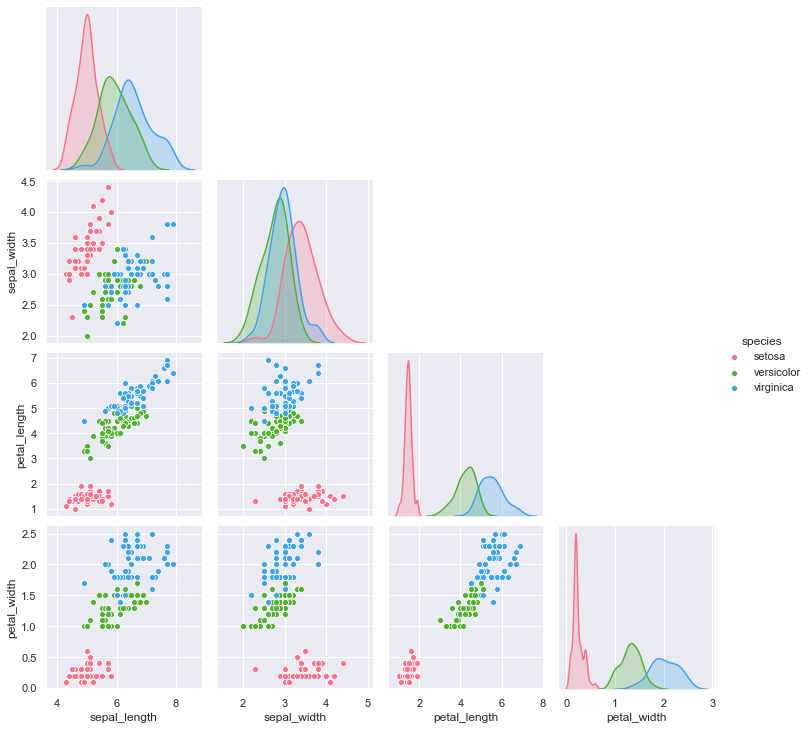

In [6]:
correlacion = sns.pairplot(data, hue = "species", palette = "husl", corner = True)

## Sepal proportion analisis

*Slicing only de sepal proportions from the dataset. After de clustering analysis, I should reach the same result as the graph above*

In [7]:
data2 = data.copy()
x = data2.iloc[:,[0,1]]
x.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


*Scatter graph*

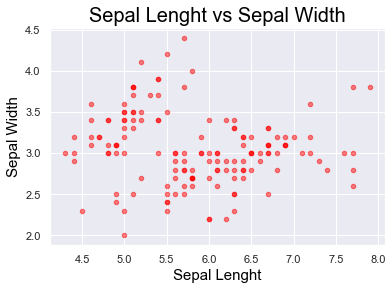

In [8]:
plt.scatter(x['sepal_length'], x['sepal_width'],s = 20, c='red', alpha = 0.5)
plt.xlabel('Sepal Lenght', fontsize = 15, c = 'black')
plt.ylabel('Sepal Width', fontsize = 15, c = 'black')
plt.title('Sepal Lenght vs Sepal Width', fontsize = 20 , c = 'Black')
plt.show()

*Standarizing values*

In [9]:
x_scaled = preprocessing.scale(x)

*Clustering*

In [10]:
kmeans = KMeans(4) 
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

Athough there are only 3 known species, I choose an arbitrary number of clusters: 4. Afterwards I'm correcting with the elbow method.

In [11]:
# Cluster variable creation.
Clusters = kmeans.fit_predict(x_scaled) 
# Checking the result
Clusters


data_con_clusters = data.copy()
data_con_clusters['Cluster'] = Clusters 
data_con_clusters 

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


*New cluster graph*

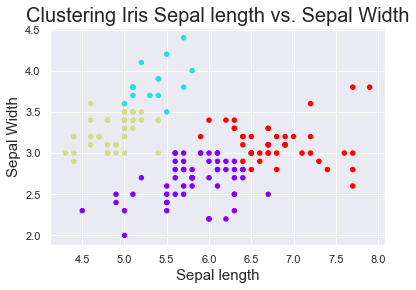

In [12]:
plt.scatter(data_con_clusters['sepal_length'], data_con_clusters['sepal_width'],s = 20,
            c = data_con_clusters['Cluster'], cmap = 'rainbow', alpha = 1) #Cada cluster cada color!
plt.title('Clustering Iris Sepal length vs. Sepal Width', fontsize = 20)
plt.xlabel('Sepal length', fontsize = 15) #EJES
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

## Elbow method

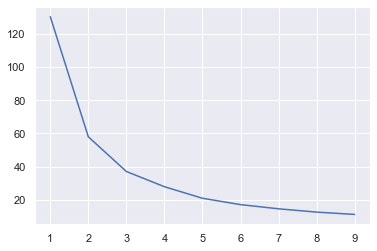

In [13]:
kmeans.inertia_

wcss=[]

for i in range (1,10): 
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
    number_clusters=range(1,10)
    
plt.plot(number_clusters,wcss) 
plt.show()

The right number of clusters are 2 or 3.

*3 Clusters*

In [14]:
kmeans = KMeans(3) 
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [15]:
Clusters = kmeans.fit_predict(x_scaled) 
Clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [16]:
data_con_clusters = data.copy()
data_con_clusters['Cluster'] = Clusters 
data_con_clusters 

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


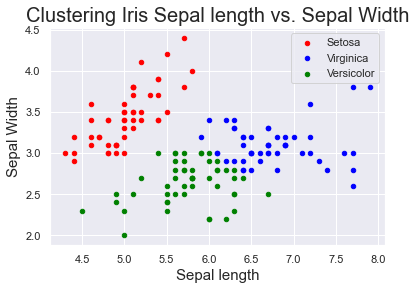

In [17]:
plt.scatter(x.values[Clusters == 0, 0], x.values[Clusters == 0, 1], s = 20, c = 'red', label = 'Setosa')
plt.scatter(x.values[Clusters == 1, 0], x.values[Clusters == 1, 1], s = 20, c = 'blue', label = 'Virginica')
plt.scatter(x.values[Clusters == 2, 0], x.values[Clusters == 2, 1], s = 20, c = 'green', label = 'Versicolor')

plt.title('Clustering Iris Sepal length vs. Sepal Width', fontsize = 20)
plt.xlabel('Sepal length', fontsize = 15) 
plt.ylabel('Sepal Width', fontsize = 15)
plt.legend()
plt.show()

The data tends to be right categorized. Sepal lenght vs. sepal widht is the relation with most overlaped plots, so is expected to have differences with the correlation plots above. In general terms, we can see that the K-Means algorithm is powerful to achieve this task.